# NOTE: Add In NetworkAllDays

In [ ]:
from TrajectoriesPlot import *
from Trajectories import *
import json
import os
import seaborn as sns
import matplotlib.patches as patches
from Trajectories_fuzzy_hierarchical_reclassification import compute_avspeed_and_variance_per_class_Fcm, compute_distribution_speed_from_trajectories_per_class,compute_class2_v_mean_v_min_v_max,compute_partition_class_traj
from Trajectories_mixing import Plot_fraction_of_points_in_other_classe

# Input Variables

In [ ]:
## ------------ SHARED VARIABLES ----------------- ##
# Important Folders
city_pro_dir = os.path.join(os.environ["WORKSPACE"],"city-pro") 
vars_dir = os.path.join(city_pro_dir, "vars")
# Config
dir_config_analysis_day = os.path.join(vars_dir,"config","config_days_bbox.json")
# N classes 
with open(os.path.join(dir_config_analysis_day),"r") as f:
    config_analysis_day = json.load(f)

# Name project-bbox
prefix_files = "bologna_mdt"
name_project_related_to_bbox = config_analysis_day["name_project"]


# Folders
config_dir = os.path.join(city_pro_dir,name_project_related_to_bbox)
fcm_dir = os.path.join(os.environ["WORKSPACE"],"city-pro","output",name_project_related_to_bbox)
PlotDir = os.path.join(fcm_dir, "plots")



# Parameters Days - Classes
StrDates = config_analysis_day["str_dates"]
num_tm = config_analysis_day["num_tm"]
labels = [str(i) for i in range(num_tm)]
Classes = [int(i) for i in range(num_tm)]

# Variables of Interest
Features = ["time_hours", "lenght_km"]

# 
lon_min,lon_max,lat_min,lat_max = config_analysis_day["lon_min"], config_analysis_day["lon_max"], config_analysis_day["lat_min"], config_analysis_day["lat_max"]


# Input Variables Typical for this ipynb

In [ ]:
# Info About Format
column_latitude = "latitude"
column_longitude = "longitude"
column_timestamp = "timestamp"
# Open and Ensure the DataFrame has the right columns
user_column = "user_id"
timestamp_column = "timestamp"
speed_column = "speed"
distance_dt_column = "distance_dt"
speed_km_h_column = "speed_kmh"
dt_sec_column = "dt_sec"
# # fcm variables
time_hours_col_Fcm = "time_hours"
id_act_col_Fcm = "id_act"

base_name = prefix_files
# NOTE: The base_dir is the one of the output of the project /city-pro/output/name_project
base_dir = os.path.join(os.environ["WORKSPACE"],"city-pro","output",name_project_related_to_bbox)




# Analysis Divided By Day

In [ ]:
fig,ax_all_days = plt.subplots(1,1,figsize = (10,10))
legend = []
for date in StrDates:
    print(date)
    traj_datafram_file = f"{base_name}_{date}_{date}_traj_dataframe.csv"
    FileName = os.path.join(base_dir,traj_datafram_file)
    PlotDir = os.path.join(base_dir,"plots",date)
    # Fcm 
    fcm_file = f"{base_name}_{date}_{date}_fcm.csv"
    fcm_total_path = os.path.join(base_dir,fcm_file)
    print("Opening TrjaDataFrame from file:", FileName)
    df = open_and_ensure_df_traj_has_right_columns(df = None,
                                                    FileName = FileName,
                                                    column_latitude = column_latitude,
                                                    column_longitude = column_longitude,
                                                    column_timestamp = column_timestamp)
    print("Add Distance and Speed to the DataFrame")
    # Add Distance and Time to the DataFrame
    Trajdf = add_segment_distance_user_from_timestamp_and_speed(df,
                                                                user_column,
                                                                timestamp_column,
                                                                speed_column,
                                                                distance_dt_column,
                                                                speed_km_h_column,
                                                                dt_sec_column)


    print("Choosing Users")
    users = Condition2Sample["rate_sampling"](Trajdf,[102,104])
#    Plot_traj_feature_colormap(user_trajs = Trajdf,
#                            users = users,
#                            column_user = "user_id",
#                            column_plot = "speed_kmh",
#                            label_colormap = "Speed km/h",
#                            PlotDir = "/home/aamad/codice/city-pro/output/bologna_mdt_center/plots/2022-07-01",
#                            SaveName = "something.png",
#                            SaveFig = False,
#                            provider_name = "Mapnik",
#                            colormap_name = "viridis",
#                            crs="EPSG:4326",
#                            crs_proj="EPSG:3857",
#                                )
    # Classification trajectories
    print("Computing FCM centers intervals")
    Fcm = pl.read_csv(fcm_total_path,separator = ";")
    Fcm = Fcm.with_columns((pl.col("time")/3600).alias("time_hours").cast(pl.Float64),
                           (pl.col("av_speed")*3.6).alias("speed_kmh").cast(pl.Float64)).to_pandas()
    DfVariability = compute_avspeed_and_variance_per_class_Fcm(Fcm)
    Df_v_boundary = compute_class2_v_mean_v_min_v_max(Fcm)
    DfScatter = compute_distribution_speed_from_trajectories_per_class(Fcm,Trajdf,Df_v_boundary)
    Plot_fraction_of_points_in_other_classe(DfScatter,PlotDir,f"mixing_classes_{date}",SaveFig = True)
    
    column_time_sampling = "dt_sec"
    cut_sampling = 200
    ax,label_day = Plot_distribution_sampling_times(Trajdf,
                                            column_time_sampling,
                                            cut_sampling,
                                            ax_all_days,
                                            PlotDir,
                                            "SamplingRate.png",
                                            SaveFig = False)
    legend.append(date +":" + label_day)
ax_all_days.legend(legend)
plt.show()

# Look for variance average speed for each class. If the variance of the trajectory is too much then there must be a score of 

In [ ]:
date = "2022-07-01"
traj_datafram_file = f"{base_name}_{date}_{date}_traj_dataframe.csv"
FileName = os.path.join(base_dir,traj_datafram_file)
PlotDir = os.path.join(base_dir,"plots",date)
fcm_file = f"{base_name}_{date}_{date}_fcm.csv"
fcm_total_path = os.path.join(base_dir,fcm_file)


In [10]:
PlotDir = os.path.join(base_dir,date)
# Upload trajectories 
df = open_and_ensure_df_traj_has_right_columns(df = None,
                                                FileName = FileName,
                                                column_latitude = column_latitude,
                                                column_longitude = column_longitude,
                                                column_timestamp = column_timestamp)
# Add Distance and Time to the DataFrame
Trajdf = add_segment_distance_user_from_timestamp_and_speed(df,
                                                            user_column,
                                                            timestamp_column,
                                                            speed_column,
                                                            distance_dt_column,
                                                            speed_km_h_column,
                                                            dt_sec_column)
Fcm = pd.read_csv(fcm_total_path,sep = ";")



# We compute how much of each trajectory speed changes

2022-01-31
/home/aamad/codice/city-pro/output/bologna_mdt_center/plots/2022-01-31/SpeedUserExample.png


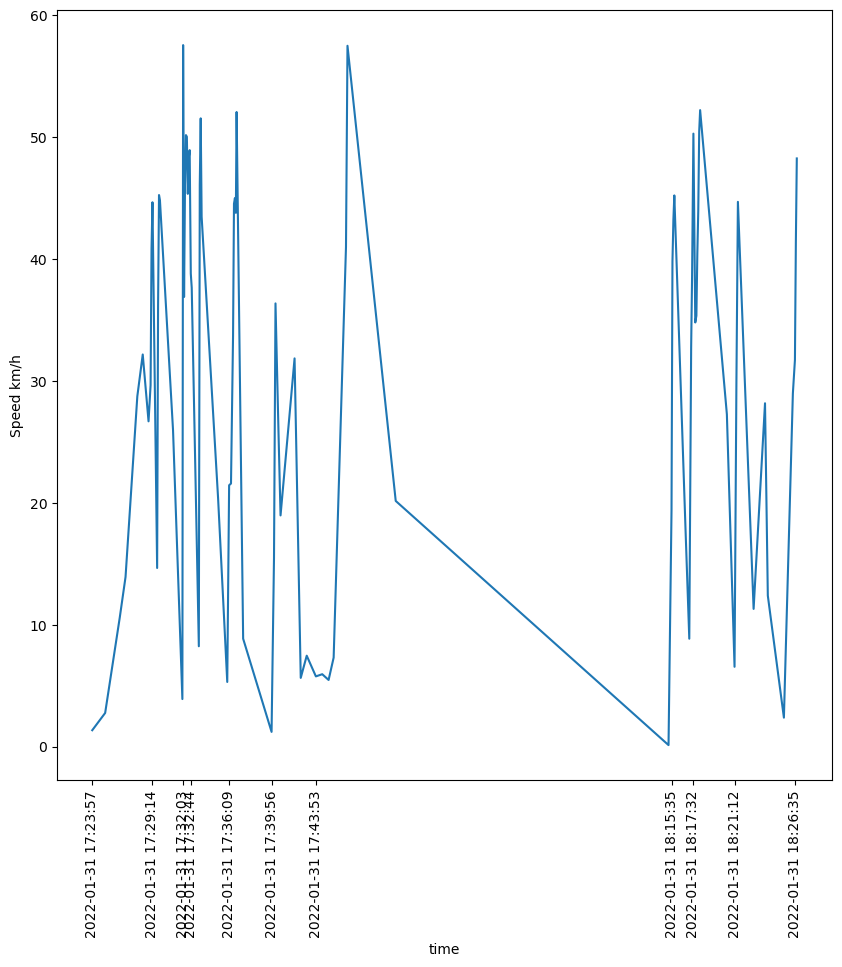

In [ ]:
user_idx = 1

fig,ax_all_days = plt.subplots(1,1,figsize = (10,10))
legend = []
for date in StrDates:
    print(date)
    # trajs
    traj_datafram_file = f"{base_name}_{date}_{date}_traj_dataframe.csv"
    FileName = os.path.join(base_dir,traj_datafram_file)
    # fcm
    fcm_file = f"{base_name}_{date}_{date}_fcm.csv"
    FileName_fcm = os.path.join(base_dir,fcm_file)
    PlotDir = os.path.join(base_dir,"plots",date)
    df = open_and_ensure_df_traj_has_right_columns(df = None,
                                                    FileName = FileName,
                                                    column_latitude = column_latitude,
                                                    column_longitude = column_longitude,
                                                    column_timestamp = column_timestamp)
    # Add Distance and Time to the DataFrame
    Trajdf = add_segment_distance_user_from_timestamp_and_speed(df,
                                                                user_column,
                                                                timestamp_column,
                                                                speed_column,
                                                                distance_dt_column,
                                                                speed_km_h_column,
                                                                dt_sec_column)

    # Fcm
    Fcm = pl.read_csv(FileName_fcm,separator=";")
    Fcm = Fcm.with_columns((pl.col("time")/3600).alias("time_hours").cast(pl.Float64))
    UsersAvailable = Fcm.filter(pl.col(time_hours_col_Fcm) > 1,
                                pl.col(time_hours_col_Fcm) < 1.5)[id_act_col_Fcm].to_list()
    if isinstance(Trajdf, pd.DataFrame):
        Trajdf = pl.from_pandas(Trajdf)
    Trajdf = Trajdf.filter(pl.col(user_column).is_in(UsersAvailable))
    # Step 1: First, count the number of rows for each user
    user_counts = Trajdf.group_by(user_column).agg(pl.len()).sort("len", descending=True)
    
    # Step 2: Get the user_id with the maximum count
    user_chosen = user_counts[user_idx, user_column]
    # Step 3: Filter the original DataFrame to get only the rows for this user
    second_largest_user_data = Trajdf.filter(pl.col(user_column) == user_chosen)
#    ax_all_days.plot(largest_user_data["datetime"],largest_user_data[speed_km_h_column],label = f"user {user_with_most_rows}")
    ax_all_days.plot(second_largest_user_data["datetime"],second_largest_user_data[speed_km_h_column],label = f"user {user_chosen}")
    ax_all_days.set_xticks(second_largest_user_data["datetime"][::8])
    ax_all_days.set_xticklabels(second_largest_user_data["datetime"].dt.strftime("%Y-%m-%d %H:%M:%S")[::8], rotation=90)
    ax_all_days.set_xlabel("time")
    ax_all_days.set_ylabel("Speed km/h")
    print(os.path.join(PlotDir,"SpeedUserExample.png"))
    plt.savefig(os.path.join(PlotDir,"SpeedUserExample.png"))
    # filter the trajectories for which the difference between timestamp  
    break

# Plots

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import networkx as nx
import numpy as np
from scipy.spatial import cKDTree
from matplotlib import pyplot as plt
import contextily as ctx
from shapely.geometry import box
##-------- PARAMETERS FOR THE SCRIPT --------##
# Time Constraints
date = "2022-07-01"
# Spatial constraints 
lon_min = 11.254601
lon_max = 11.396050
lat_min = 44.479459
lat_max = 44.536751
# animation
is_animation = False 
is_class = False  # Set to True if you want to use class-based filtering


# Road Network -> Bounded by bounding box
roads_gdf = gpd.read_file(os.path.join(base_dir,"plots",f"{date}",f"GeoJson_{date}.geojson"))
roads_gdf.set_crs(epsg=4326, inplace=True)  # Ensure the CRS is set to WGS84
b_box =  box(lon_min, lat_min, lon_max, lat_max)
roads_gdf = roads_gdf.loc[roads_gdf["geometry"].within(b_box)]
local_crs = "EPSG:32632"  # UTM zone 32N
roads_gdf_projected = roads_gdf.to_crs(local_crs)

# Fuzzy C-Means Clustering
fcm_file = f"{base_name}_{date}_{date}_fcm.csv"
FileName_fcm = os.path.join(base_dir,fcm_file)
Fcm = pl.read_csv(os.path.join(base_dir,fcm_file),separator=";")
Fcm = Fcm.with_columns((pl.col("time")/3600).alias("time_hours").cast(pl.Float64))

# Trajectories DataFrame
traj_datafram_file = f"{base_name}_{date}_{date}_traj_dataframe.csv"
FileName = os.path.join(base_dir,traj_datafram_file)
Trajdf = get_trajdf(FileName,
                    column_latitude, 
                    column_longitude, 
                    column_timestamp,
                    user_column, 
                    timestamp_column,
                    speed_column, 
                    distance_dt_column, 
                    speed_km_h_column, 
                    dt_sec_column)


if is_class:
    # Filter Users based on FCM
    class_2_users = pick_random_users_by_class(Fcm.filter(pl.col("time_hours") > 0.5, pl.col("time_hours") < 1.5), user_column = "id_act", user_class_column="class", seed=39)
    UsersAvailable = list(class_2_users.values())
else:
    # Filter by cut trajectories
    cut_sizes = [1,5,10,50,100]
    df_cut_traj = pl.read_csv(os.path.join(base_dir,f"{base_name}_{date}_{date}_cut_traj.csv"),separator=";")

UsersAvailable,CutSizes = pick_user_by_cut_size(df_cut_traj, cut_sizes,number_sampled_users_per_size = 3)
if isinstance(Trajdf, pd.DataFrame):
    Trajdf = pl.from_pandas(Trajdf)

user_counts = Trajdf.filter(pl.col(user_column).is_in(UsersAvailable))

# Step 2: Get the user_id with the maximum count


#for user_idx in range(10):
i = 0
for user_chosen in UsersAvailable:
    if is_class:
        class_ = Fcm.filter(pl.col("id_act") == user_chosen)["class"].to_list()[0]
        print(f"Processing user {user_chosen}, class {class_}")
    else:
        cut_size = CutSizes[i]
        print(f"Processing user {user_chosen}, cut size {cut_size}")
    user_df = pl.DataFrame(Trajdf).filter(pl.col(user_column) == user_chosen)
#    user_df = Trajdf.filter(pl.col(user_column) == user_counts[user_idx, user_column])
    if user_df.is_empty():
        print(f"No data available for user {user_chosen}. Skipping...")
        continue
    else:
        # Step 1: Convert your Polars DataFrame to a GeoDataFrame
        if not isinstance(user_df, pd.DataFrame):
            traj_df_pd = user_df.to_pandas()
        else:
            traj_df_pd = user_df

        # Create a GeoDataFrame with Point geometries and project it
        trajectory_gdf = gpd.GeoDataFrame(
            traj_df_pd,
            geometry=gpd.points_from_xy(traj_df_pd.lng, traj_df_pd.lat),
            crs="EPSG:4326"  # WGS84 coordinate system
        )
        trajectory_gdf_projected = trajectory_gdf.to_crs(local_crs)

        # Step 3: Perform spatial join to find which road segment each point is nearest to
        joined_trajectory_gdf = gpd.sjoin_nearest(trajectory_gdf_projected, roads_gdf_projected, how="left", max_distance=15)
        # After sjoin_nearest, the index of the matched road is in 'index_right'
        joined_trajectory_gdf['nearest_road_geometry'] = joined_trajectory_gdf['index_right'].map(
            roads_gdf_projected.geometry
        )

        # Apply to each row to get the closest point on the road for each trajectory point
        joined_trajectory_gdf['closest_point_on_road'] = joined_trajectory_gdf.apply(get_closest_point_on_linestring, axis=1)

        # Step 4: Build a graph from the LineStrings
        G, coords_node = get_graph_from_gdf_roads(roads_gdf_projected)
        
        paths,path_geometries = from_gdf_2_path_geometries(joined_trajectory_gdf,G,coords_node)
    # Create initial map with the first layer
        m = roads_gdf.explore(
            color="blue",
            style_kwds={"weight": 2, "opacity": 0.7},
            name="road",
        )

        m = trajectory_gdf.explore(
            color="green",
            marker_kwds={"radius": 4},
            tooltip=["user_id", "datetime"],
            name="Trajectory Points",
            m=m
        )
        m
        break
        # Step 6: Create a GeoDataFrame of the paths
        if path_geometries:
            paths_gdf = gpd.GeoDataFrame(path_geometries, crs=local_crs)
            
            # Step 7: Plot the results - convert back to WGS84 for plotting
            fig, ax = plt.subplots(figsize=(12, 10))
            
            # Convert to WGS84 for consistent plotting
            roads_gdf.to_crs(local_crs).plot(ax=ax, color='gray', linewidth=0.5, alpha=0.5)
            paths_gdf_wgs84 = paths_gdf.to_crs("EPSG:4326")
            paths_gdf_wgs84.to_crs(local_crs).plot(ax=ax, color='green', linewidth=3)
            trajectory_gdf.to_crs(local_crs).plot(ax=ax, color='red', markersize=30, alpha=0.7,marker='*')
            
            # Set plot title and labels
            ax.set_title('Trajectory Points and Computed Shortest Paths')
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')
            ctx.add_basemap(ax, crs=local_crs, source=ctx.providers.OpenStreetMap.Mapnik)
            ax.set_aspect(1)
            scalebar = ScaleBar(1, location='lower left')
            ax.add_artist(scalebar)


            # Show the plot
            plt.tight_layout()
            if is_class:
                plt.savefig(os.path.join(os.environ["WORKSPACE"],"city-pro","output","bologna_mdt_center","plots",f"trajectory_with_shortest_paths_{user_idx}_class_{class_}.png"),dpi = 200)
            else:
                plt.savefig(os.path.join(os.environ["WORKSPACE"],"city-pro","output","bologna_mdt_center","plots",f"trajectory_with_shortest_paths_{user_idx}_cut_{cut_size}.png"),dpi = 200)
            plt.show()
            if is_animation:
                if is_class:
                    gif_filename = os.path.join(os.environ["WORKSPACE"],"city-pro","output","bologna_mdt_center","plots",f"user_trajectory_animation_{user_idx}_class_{class_}.gif")
                else:
                    gif_filename = os.path.join(os.environ["WORKSPACE"],"city-pro","output","bologna_mdt_center","plots",f"user_trajectory_animation_{user_idx}_cut_{cut_size}.gif")
                # Animation of the trajectory:
                anim = create_trajectory_animation_gif(
                    second_largest_user_data=second_largest_user_data,
                    roads_gdf=roads_gdf,
                    paths_gdf=paths_gdf,
                    trajectory_gdf=trajectory_gdf,
                    speed_km_h_column=speed_km_h_column,
                    user_chosen=user_chosen,
                    local_crs=local_crs,
                    gif_filename=gif_filename,
                    fps=2
                )        
        else:
            print("No paths were generated. Check if the trajectory points are near the road network.")
    i += 1

Processing user 3885014637, cut size 1
No data available for user 3885014637. Skipping...
Processing user 3915825921, cut size 1
No data available for user 3915825921. Skipping...
Processing user 3726094167, cut size 1
No data available for user 3726094167. Skipping...
Processing user 4167989500, cut size 1


AttributeError: 'LineString' object has no attribute 'x'

In [17]:
for t in range(len(second_largest_user_data)):
    if t > 0:
        fig,ax = plt.subplots(1,2,figsize = (10,10))
        ax[0].plot(second_largest_user_data["datetime"][:t],second_largest_user_data[speed_km_h_column][:t], label=f"user {user_chosen}")
        roads_gdf.to_crs(local_crs).plot(ax=ax[1], color='gray', linewidth=0.5, alpha=0.5)
        paths_gdf_wgs84 = paths_gdf.to_crs("EPSG:4326")
        paths_gdf_wgs84[:t].to_crs(local_crs).plot(ax=ax[1], color='green', linewidth=3)
        trajectory_gdf[:t].to_crs(local_crs).plot(ax=ax[1], color='red', markersize=30, alpha=0.7,marker='*')
        
        # Set plot title and labels
        ax[1].set_title('Trajectory Points and Computed Shortest Paths')
        ax[1].set_xlabel('Longitude')
        ax[1].set_ylabel('Latitude')
        ctx.add_basemap(ax[1], crs=local_crs, source=ctx.providers.OpenStreetMap.Mapnik)
        ax[1].set_aspect(1)
        scalebar = ScaleBar(1, location='lower left')
        ax[1].add_artist(scalebar)
        # Show the plot
        plt.tight_layout()
        plt.show()
        plt.close(fig)


In [ ]:
import folium
# Create initial map with the first layer
m = roads_gdf.explore(
    color="blue",
    style_kwds={"weight": 2, "opacity": 0.7},
    name="road",
)

m = trajectory_gdf.explore(
    color="green",
    marker_kwds={"radius": 4},
    tooltip=["user_id", "datetime"],
    name="Trajectory Points",
    m=m
)


# Add the second layer to the same map
paths_gdf_wgs84.explore(
    color="red",
    style_kwds={"weight": 5, "opacity": 0.7},
    tooltip=["user_id", "start_time", "end_time"],
    name="Computed Paths",
    m=m  # Pass the existing map to add this layer to it
)


# Add a layer control
folium.LayerControl().add_to(m)

# Display the map
m

# Aggregated Analysis

2022-01-31
2022-07-01
2022-08-05
2022-11-11
2022-12-30
2022-12-31
2023-01-01
2023-03-18
class:  0
class:  1
class:  2
class:  3
class:  0
class:  1
class:  2
class:  3
class:  0
class:  1
class:  2
class:  3


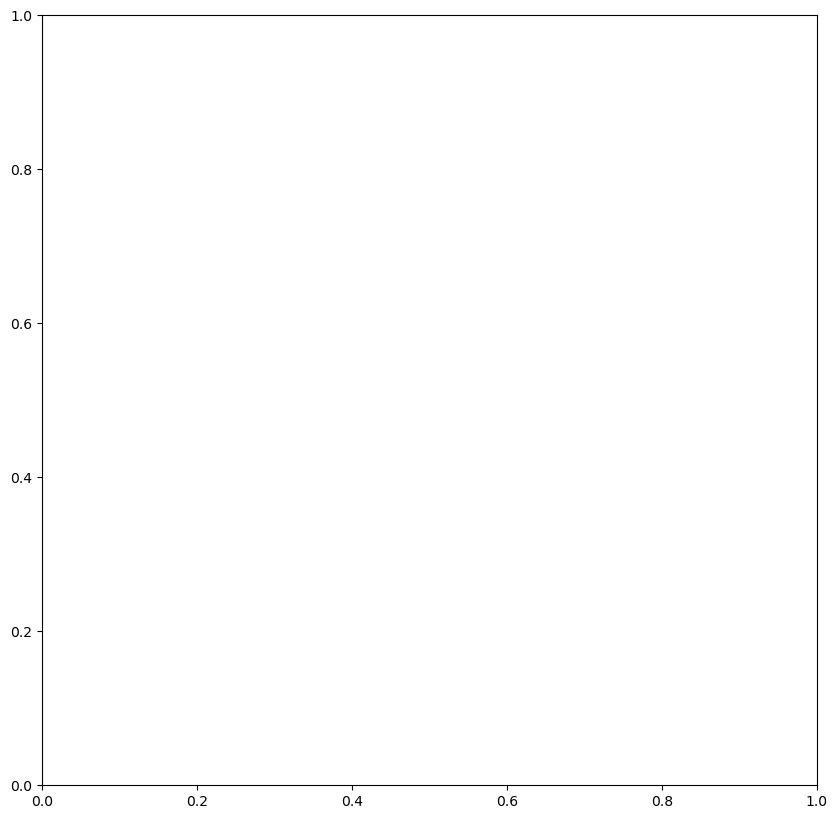

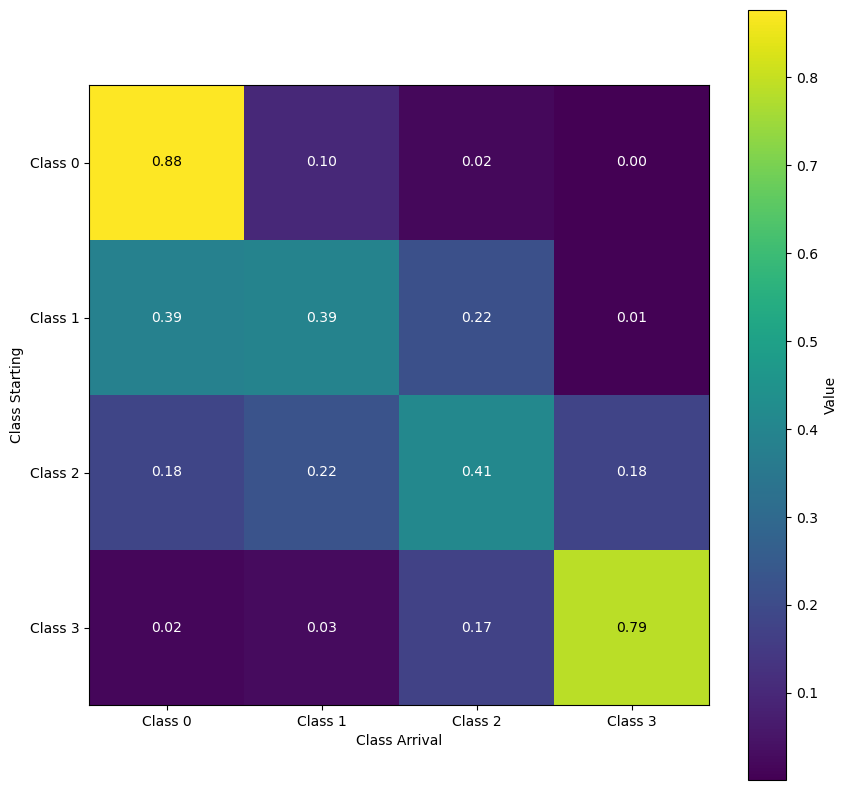

In [35]:
from TrajectoriesPlot import *
from Trajectories import *
name_project = "bologna_mdt_center"
base_name = "bologna_mdt"
base_dir = os.path.join(os.environ["WORKSPACE"],"city-pro","output",name_project)
# Info About Format
column_latitude = "latitude"
column_longitude = "longitude"
column_timestamp = "timestamp"
# Open and Ensure the DataFrame has the right columns
user_column = "user_id"
timestamp_column = "timestamp"
speed_column = "speed"
distance_dt_column = "distance_dt"
speed_km_h_column = "speed_kmh"
dt_sec_column = "dt_sec"
fig,ax_all_days = plt.subplots(1,1,figsize = (10,10))
legend = []
is_first = True
for date in ["2022-01-31","2022-07-01","2022-08-05","2022-11-11","2022-12-30","2022-12-31","2023-01-01","2023-03-18"]:
    print(date)
    # Trajectories
    traj_datafram_file = f"{base_name}_{date}_{date}_traj_dataframe.csv"
    FileName = os.path.join(base_dir,traj_datafram_file)
    # Fcm
    fcm_file = f"{base_name}_{date}_{date}_fcm.csv"
    fcm_total_path = os.path.join(base_dir,fcm_file)
    # PlotDir
    PlotDir = os.path.join(base_dir,"plots")
    # Upload trajectories
    df = open_and_ensure_df_traj_has_right_columns(df = None,
                                                    FileName = FileName,
                                                    column_latitude = column_latitude,
                                                    column_longitude = column_longitude,
                                                    column_timestamp = column_timestamp)
    # Add Distance and Time to the DataFrame
    Trajdf = add_segment_distance_user_from_timestamp_and_speed(df,
                                                                user_column,
                                                                timestamp_column,
                                                                speed_column,
                                                                distance_dt_column,
                                                                speed_km_h_column,
                                                                dt_sec_column)

    Fcm = pd.read_csv(fcm_total_path)
    
    if is_first:
        TrajConcat = Trajdf
        FcmConcat = Fcm    
        is_first = False
    else:
        TrajConcat = pd.concat([TrajConcat,Trajdf])
        FcmConcat = pd.concat([FcmConcat,Fcm])
DfVariability = compute_avspeed_and_variance_per_class_Fcm(FcmConcat)
Df_v_boundary = compute_class2_v_mean_v_min_v_max(FcmConcat)
DfScatter = compute_distribution_speed_from_trajectories_per_class(FcmConcat,TrajConcat,Df_v_boundary)
Plot_fraction_of_points_in_other_classe(DfScatter,PlotDir,f"mixing_classes.png",SaveFig = True)


In [ ]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
#for class_,df_class in DfScatter.groupby("class"):
g = sns.jointplot(data = DfScatter,
                x = "av_speed_kmh",
                y = "var_speed_kmh",
                kind = "kde",
                hue = "class",
                ax = ax)
# Add the line x = y
x_min, x_max = g.ax_joint.get_xlim()
y_min, y_max = g.ax_joint.get_ylim()
line_min = max(x_min, y_min)
line_max = min(x_max, y_max)
g.ax_joint.plot([line_min, line_max], [line_min, line_max], linestyle="--", color="black", label="x = y")

# Add the scatter plot of the averages

# Add squares centered on the averages with side length equal to sigma
for class_ in Df_v_boundary["class"].unique():
#    avg_speed = Df_v_boundary.loc[Df_v_boundary["class"] == class_]["v_mean"][0]
#    v_min = Df_v_boundary.loc[Df_v_boundary["class"] == class_]["v_min"][0]
#    v_max = Df_v_boundary.loc[Df_v_boundary["class"] == class_]["v_max"][0]
#    sigmav = avg_speed - v_min  
#    # Create a square centered on the average
#    square = patches.Rectangle(
#        (avg_speed + sigmav/2, avg_speed - sigmav/2),  # Bottom-left corner
#        sigmav,  # Width
#        sigmav,  # Height
#        linewidth=1,
#        edgecolor="red",
#        facecolor="none",
#        label=f"Class {class_} σ"
#    )
#    g.ax_joint.add_patch(square)
    
    g.ax_joint.scatter(
    DfVariability["av_speed_kmh"],
    DfVariability["var_speed_kmh"],
    color="black",
    zorder=5
)

# Add a legend
g.ax_joint.legend()

#g.set_axis_labels(r"$\langle v \rangle_u$ km/h", r"$\frac{\sigma_v}{\langle v \rangle_u}$")
g.set_axis_labels(r"$\langle v \rangle_u$ km/h", r"$\sigma_v km/h$")
plt.show() 

# Plot the distribution of the partitions of trajectory points


[Text(0, 0, 'Class 0'),
 Text(0, 1, 'Class 1'),
 Text(0, 2, 'Class 2'),
 Text(0, 3, 'Class 3')]

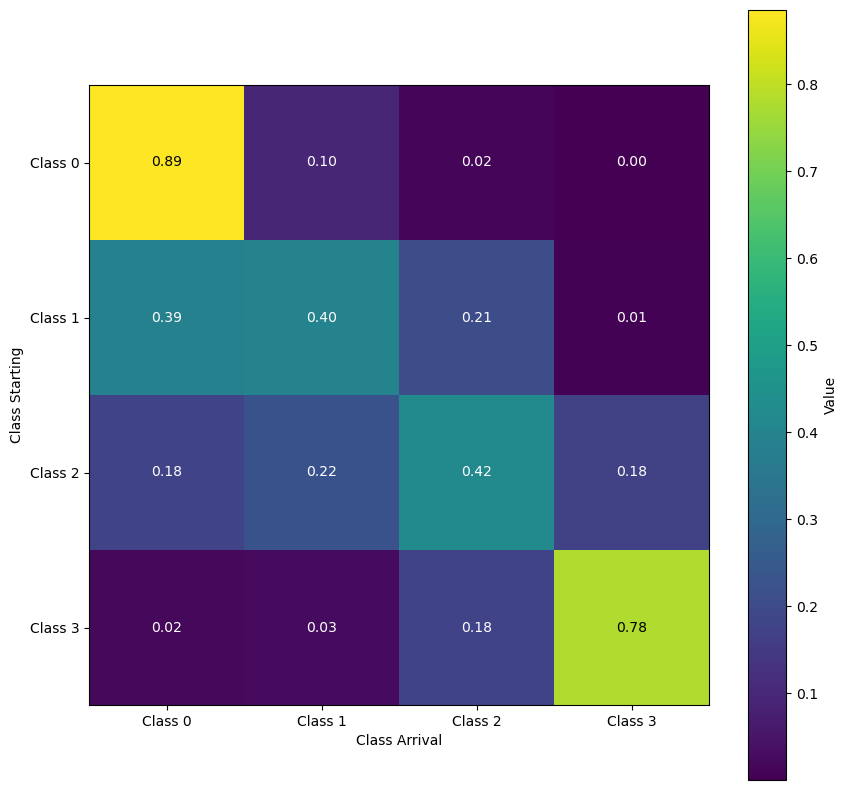

In [ ]:
# Show the plotplt.show()  

# KPZ

Running KPZ simulation...


/tmp/ipykernel_125724/706154454.py:59: RuntimeWarning: overflow encountered in square
  grad_h_sq = grad_h**2
/tmp/ipykernel_125724/706154454.py:57: RuntimeWarning: invalid value encountered in subtract
  grad_h[:-1] = h[1:] - h[:-1]


Creating visualization...
Analyzing roughness scaling...


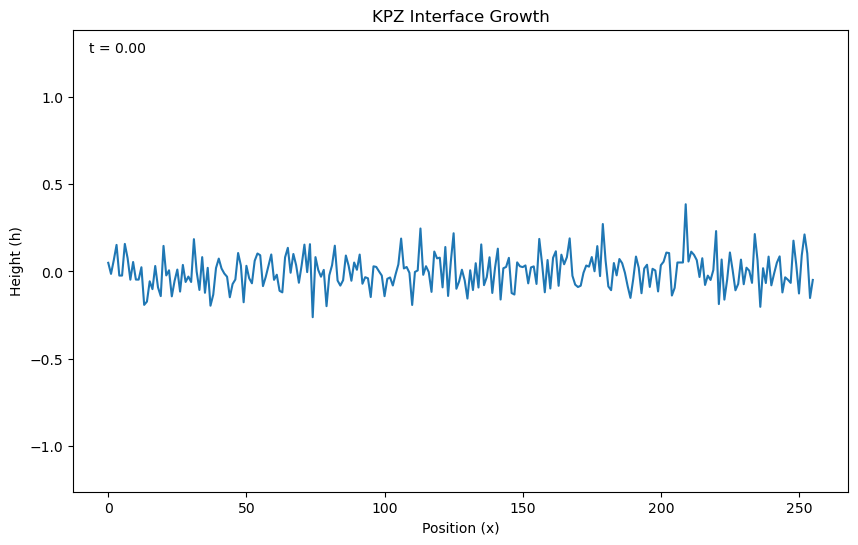

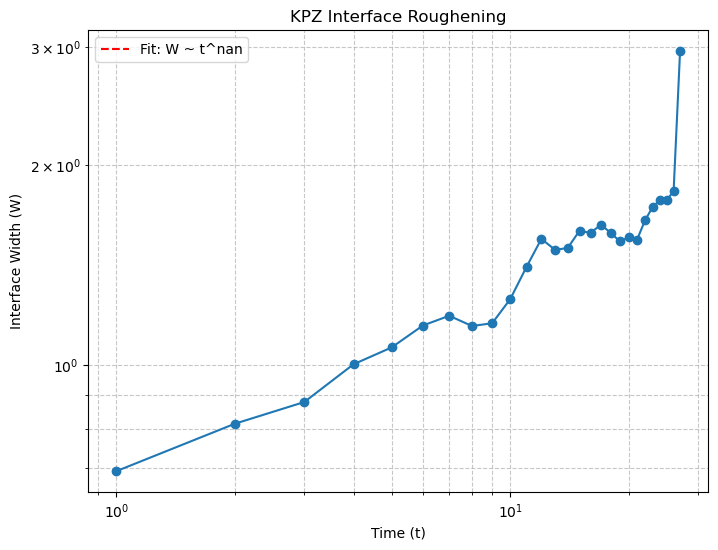

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.ndimage import laplace

def kpz_simulation(L=256, T=1000, dt=0.01, nu=1.0, lambda_=1.0, D=1.0, seed=None):
    """
    Simulate the Kardar-Parisi-Zhang equation in 1D.
    
    Parameters:
    -----------
    L : int, default=256
        System size (number of grid points)
    T : int, default=1000
        Total simulation time steps
    dt : float, default=0.01
        Time step
    nu : float, default=1.0
        Surface tension (diffusion coefficient)
    lambda_ : float, default=1.0
        Strength of the nonlinear term
    D : float, default=1.0
        Noise intensity
    seed : int, default=None
        Random seed for reproducibility
    
    Returns:
    --------
    h_history : ndarray
        Height field history, shape (T//save_every + 1, L)
    t_points : ndarray
        Time points corresponding to the saved height fields
    """
    # Set random seed for reproducibility
    if seed is not None:
        np.random.seed(seed)
    
    # Initialize height field
    h = np.zeros(L)
    
    # Add small random perturbation
    h += 0.1 * np.random.randn(L)
    
    # Parameters for data saving
    save_every = max(1, T // 100)  # Save at most 100 frames
    h_history = np.zeros((T // save_every + 1, L))
    t_points = np.zeros(T // save_every + 1)
    h_history[0] = h.copy()
    
    # Simulation loop
    for t in range(1, T+1):
        # Calculate Laplacian (∇²h) using periodic boundary conditions
        lap_h = laplace(h, mode='wrap')
        
        # Calculate squared gradient (|∇h|²) using central differences with periodic BC
        grad_h = np.zeros_like(h)
        grad_h[:-1] = h[1:] - h[:-1]
        grad_h[-1] = h[0] - h[-1]
        grad_h_sq = grad_h**2
        
        # Generate noise term
        noise = np.sqrt(2 * D * dt) * np.random.randn(L)
        
        # Update height field using KPZ equation
        h += (nu * lap_h + (lambda_ / 2) * grad_h_sq) * dt + noise
        
        # Save data at regular intervals
        if t % save_every == 0:
            idx = t // save_every
            h_history[idx] = h.copy()
            t_points[idx] = t * dt
        
    return h_history, t_points

def visualize_simulation(h_history, t_points):
    """
    Create an animation of the KPZ interface growth.
    
    Parameters:
    -----------
    h_history : ndarray
        Height field history from the simulation
    t_points : ndarray
        Time points corresponding to the saved height fields
    
    Returns:
    --------
    fig : matplotlib Figure
        Figure containing the animation
    ani : FuncAnimation
        Animation object
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    L = h_history.shape[1]
    x = np.arange(L)
    
    line, = ax.plot(x, h_history[0])
    time_text = ax.text(0.02, 0.95, f't = {0:.2f}', transform=ax.transAxes)
    
    ax.set_xlabel('Position (x)')
    ax.set_ylabel('Height (h)')
    ax.set_title('KPZ Interface Growth')
    
    # Update function for animation
    def update(frame):
        line.set_ydata(h_history[frame])
        time_text.set_text(f't = {t_points[frame]:.2f}')
        ax.set_ylim(h_history[frame].min() - 1, h_history[frame].max() + 1)
        return line, time_text
    
    ani = FuncAnimation(
        fig, update, frames=range(len(t_points)), 
        interval=50, blit=True
    )
    
    return fig, ani

def analyze_roughness(h_history, t_points):
    """
    Analyze the interface width (roughness) growth with time.
    
    Parameters:
    -----------
    h_history : ndarray
        Height field history from the simulation
    t_points : ndarray
        Time points corresponding to the saved height fields
    
    Returns:
    --------
    fig : matplotlib Figure
        Figure showing the roughness vs time plot
    """
    # Calculate interface width (roughness) over time
    h_mean = np.mean(h_history, axis=1)
    width = np.sqrt(np.mean((h_history - h_mean[:, np.newaxis])**2, axis=1))
    
    # Create log-log plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.loglog(t_points[1:], width[1:], 'o-')
    
    # Fit to expected power law W ~ t^β for early times
    # For KPZ in 1D, we expect β ≈ 1/3
    mid_idx = len(t_points) // 3
    log_t = np.log(t_points[1:mid_idx])
    log_w = np.log(width[1:mid_idx])
    slope, intercept = np.polyfit(log_t, log_w, 1)
    
    ax.plot(t_points[1:mid_idx], np.exp(intercept) * t_points[1:mid_idx]**slope, 'r--', 
            label=f'Fit: W ~ t^{slope:.3f}')
    
    ax.set_xlabel('Time (t)')
    ax.set_ylabel('Interface Width (W)')
    ax.set_title('KPZ Interface Roughening')
    ax.legend()
    ax.grid(True, which="both", ls="--", alpha=0.7)
    
    return fig

# Example usage
if __name__ == "__main__":
    # Run simulation
    print("Running KPZ simulation...")
    h_history, t_points = kpz_simulation(L=256, T=10000, dt=0.01, 
                                        nu=1.0, lambda_=1.0, D=0.5, 
                                        seed=42)
    
    # Create visualization
    print("Creating visualization...")
    fig_anim, ani = visualize_simulation(h_history, t_points)
    
    # Save animation as GIF
    # ani.save('kpz_simulation.gif', writer='pillow')
    
    # Analyze roughness scaling
    print("Analyzing roughness scaling...")
    fig_rough = analyze_roughness(h_history, t_points)
    
    plt.show()

# Katz Centrality - Cavity Method

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import poisson
from collections import Counter

# Parameters
N = 5000
c = 4
alpha = 1/30
n_graphs = 30

# Degree distribution: Poisson with mean c
degree_pmf = poisson.pmf(np.arange(20), c)
k_vals = np.arange(len(degree_pmf))

# Storage for centrality values
Ks_all = []

print("Generating centrality histograms...")
for _ in range(n_graphs):
    G = nx.erdos_renyi_graph(N, c / (N - 1))
    A = nx.adjacency_matrix(G).toarray()
    I = np.eye(N)

    try:
        Ks = np.linalg.solve(I - alpha * A, np.ones(N))
        Ks_all.extend(Ks.tolist())
    except np.linalg.LinAlgError:
        continue

# Shifted Katz centrality: subtract 1
Ks_shifted = np.array(Ks_all) - 1

# Histogram for empirical values
hist_y, hist_x = np.histogram(Ks_shifted, bins=100, density=True)
hist_xc = (hist_x[:-1] + hist_x[1:]) / 2

# Dirac comb approximation using Eq. (57)
def dirac_comb(k_vals, alpha, c, scaling=1.0):
    k2 = np.sum(k_vals**2 * poisson.pmf(k_vals, c))
    prefactor = alpha / (1 - alpha * (c + 1))
    x_vals = prefactor * k_vals
    y_vals = poisson.pmf(k_vals, c) * scaling
    return x_vals, y_vals

# Linear truncation approximation using Eq. (53): Ks ≈ 1 + alpha * k → K ≈ alpha * k
x_lin = alpha * k_vals
y_lin = poisson.pmf(k_vals, c) * 20  # scaled for visibility



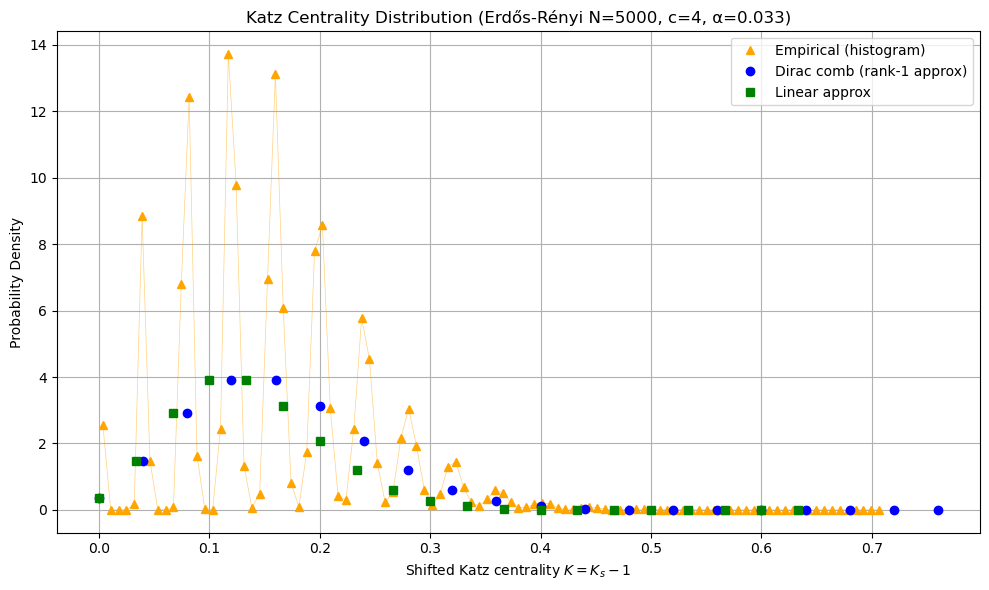

In [2]:
# Plotting
plt.figure(figsize=(10, 6))

# Orange triangles: histogram
plt.plot(hist_xc, hist_y, '^', color='orange', label="Empirical (histogram)")
plt.plot(hist_xc, hist_y, '-', color='orange', alpha=0.5,label = '', linewidth=0.5)
# Blue dots: rank-1 Dirac comb approximation
x_dirac, y_dirac = dirac_comb(k_vals, alpha, c, scaling=20)
plt.plot(x_dirac, y_dirac, 'o', color='blue', label="Dirac comb (rank-1 approx)")

# Green squares: linear approximation
plt.plot(x_lin, y_lin, 's', color='green', label="Linear approx")

plt.xlabel("Shifted Katz centrality $K = K_s - 1$")
plt.ylabel("Probability Density")
plt.title(f"Katz Centrality Distribution (Erdős-Rényi N={N}, c={c}, α={alpha:.3f})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Computing empirical shifted Katz centrality from matrix inversion...


100%|██████████| 1000/1000 [01:15<00:00, 13.30it/s]


Running population dynamics...


100%|██████████| 100/100 [03:21<00:00,  2.01s/it]


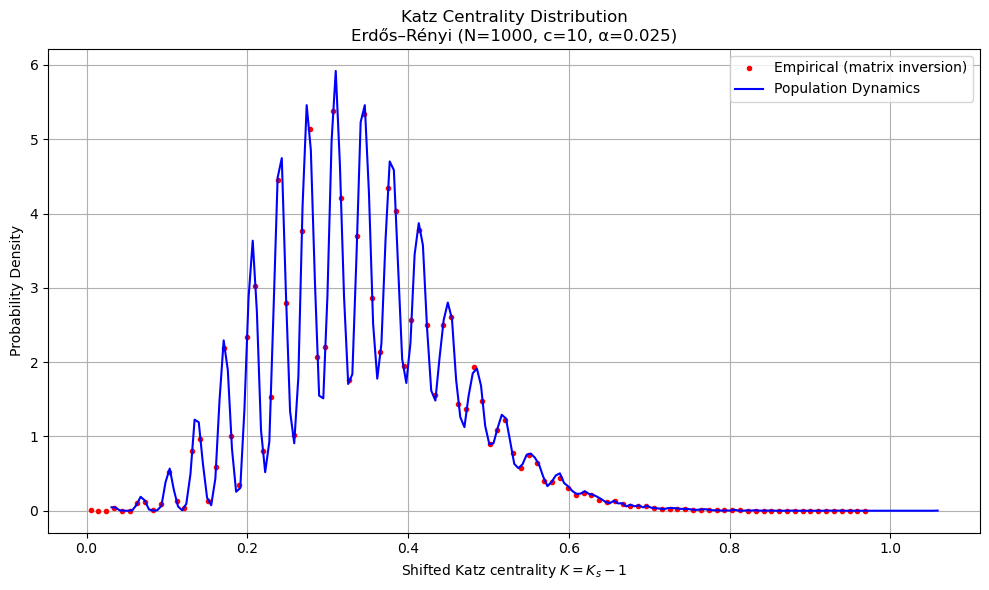

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm

# --- Parameters ---
N = 1000                 # nodes per graph
c = 10                  # average degree
alpha = 1 / 40          # Katz attenuation factor
n_graphs = 1000         # number of graphs for empirical part
NP = 10**5              # population size
sweeps = 100            # number of population dynamics sweeps
np.random.seed(42)

# =========================
# PART 1: Empirical Data
# =========================

empirical_Ks = []

print("Computing empirical shifted Katz centrality from matrix inversion...")
for _ in tqdm(range(n_graphs)):
    G = nx.erdos_renyi_graph(N, c / (N - 1))
    A = nx.adjacency_matrix(G).toarray()
    I = np.eye(N)
    try:
        Ks = np.linalg.solve(I - alpha * A, np.ones(N))  # Eq. (5)
        empirical_Ks.extend(Ks.tolist())
    except np.linalg.LinAlgError:
        continue

empirical_Ks = np.array(empirical_Ks)
empirical_Ks_shifted = empirical_Ks - 1  # Shift to K = Ks - 1

# =========================
# PART 2: Population Dynamics
# =========================

print("Running population dynamics...")

# Initialize population with random values
M = np.random.normal(loc=1.0, scale=0.1, size=NP)
V = np.abs(np.random.normal(loc=1.0, scale=0.1, size=NP))

for _ in tqdm(range(sweeps)):
    for i in range(NP):
        k = np.random.poisson(c)
        k = max(k, 1)
        idx = np.random.choice(NP, k, replace=True)
        V_sub = V[idx]
        M_sub = M[idx]

        V_new = 1.0 / (1 - alpha**2 * np.sum(V_sub))
        M_new = V_new * (1 + alpha * np.sum(M_sub))

        V[i] = V_new
        M[i] = M_new

M_shifted = M - 1  # Shift to K = Ks - 1

# =========================
# PLOT
# =========================

plt.figure(figsize=(10, 6))

# Empirical histogram (red circles)
hist_y, hist_x = np.histogram(empirical_Ks_shifted, bins=100, density=True)
hist_xc = (hist_x[:-1] + hist_x[1:]) / 2
plt.plot(hist_xc, hist_y, 'ro', markersize=3, label='Empirical (matrix inversion)')

# Population dynamics histogram (blue solid line)
pop_y, pop_x = np.histogram(M_shifted, bins=200, density=True)
pop_xc = (pop_x[:-1] + pop_x[1:]) / 2
plt.plot(pop_xc, pop_y, 'b-', linewidth=1.5, label='Population Dynamics')

plt.xlabel("Shifted Katz centrality $K = K_s - 1$")
plt.ylabel("Probability Density")
plt.title(f"Katz Centrality Distribution\nErdős–Rényi (N={N}, c={c}, α={alpha:.3f})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Fuzzy 

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches

def fuzzy_cmeans_step_by_step(data, c, m, max_iter=100, error=0.005, init_centers=None):
    """
    Fuzzy C-Means clustering with step-by-step tracking
    """
    n_features, n_samples = data.shape
    
    # Initialize cluster centers
    if init_centers is None:
        cntr = np.random.rand(c, n_features)
    else:
        cntr = init_centers.copy()
    
    # History tracking
    history = {
        'centers': [cntr.copy()],
        'membership': [],
        'objective': [],
        'iteration': [0]
    }
    
    for iteration in range(max_iter):
        # Calculate distances between data points and cluster centers
        distances = np.zeros((c, n_samples))
        for i in range(c):
            distances[i] = np.linalg.norm(data - cntr[i:i+1].T, axis=0)
        
        # Avoid division by zero
        distances = np.fmax(distances, np.finfo(float).eps)
        
        # Calculate membership matrix
        u = np.zeros((c, n_samples))
        for i in range(c):
            for j in range(n_samples):
                denominator = np.sum([(distances[i, j] / distances[k, j]) ** (2 / (m - 1)) 
                                    for k in range(c)])
                u[i, j] = 1 / denominator
        
        # Calculate objective function
        objective = np.sum(u**m * distances**2)
        
        # Update cluster centers - VECTORIZED FIX
        u_m = u ** m  # Shape: (c, n_samples)
        cntr_new = np.dot(u_m, data.T) / np.sum(u_m, axis=1, keepdims=True)
        
        # Store history
        history['centers'].append(cntr_new.copy())
        history['membership'].append(u.copy())
        history['objective'].append(objective)
        history['iteration'].append(iteration + 1)
        
        # Check convergence
        if np.linalg.norm(cntr_new - cntr) < error:
            break
            
        cntr = cntr_new
    
    return history

def create_fuzzy_cmeans_animation(data, c=3, m=2, max_iter=50, interval=800, save_gif=False, filename='fuzzy_cmeans.gif'):
    """
    Create an animation of Fuzzy C-Means clustering evolution
    
    Parameters:
    -----------
    data : array-like, shape (2, n_samples)
        2D data to cluster
    c : int
        Number of clusters
    m : float
        Fuzziness parameter
    max_iter : int
        Maximum number of iterations
    interval : int
        Animation interval in milliseconds
    save_gif : bool
        Whether to save animation as GIF
    filename : str
        Filename for saved GIF
    """
    
    # Run fuzzy c-means step by step
    np.random.seed(42)  # For reproducible results
    history = fuzzy_cmeans_step_by_step(data, c, m, max_iter)
    
    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Create custom colormap
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray'][:c]
    
    def animate(frame):
        ax1.clear()
        ax2.clear()
        
        # Get current iteration data
        if frame == 0:
            # Initial state - only show centers
            centers = history['centers'][0]
            ax1.scatter(data[0], data[1], c='lightgray', alpha=0.5, s=50)
            ax1.scatter(centers[:, 0], centers[:, 1], c=colors[:c], marker='X', s=200, 
                       edgecolors='black', linewidth=2, label='Initial Centers')
            ax1.set_title(f'Iteration {frame}: Initial State')
            
            # Empty objective plot
            ax2.set_title('Objective Function Evolution')
            ax2.set_xlabel('Iteration')
            ax2.set_ylabel('Objective Function Value')
            ax2.grid(True, alpha=0.3)
            
        else:
            # Get membership matrix and centers for current iteration
            u = history['membership'][frame-1]
            centers = history['centers'][frame]
            
            # Plot points using hard assignment instead of problematic colormaps
            cluster_assignments = np.argmax(u, axis=0)
            for i in range(c):
                mask = cluster_assignments == i
                if np.any(mask):
                    # Use membership values as alpha for transparency effect
                    alphas = u[i][mask]
                    sizes = 20 + 80 * alphas  # Size varies with membership
                    ax1.scatter(data[0][mask], data[1][mask], c=colors[i], 
                              alpha=0.7, s=sizes, label=f'Cluster {i}')
            
            # Plot cluster centers
            ax1.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=300, 
                       edgecolors='white', linewidth=3, label='Centers')
            
            # Add center trajectories
            if frame > 1:
                for i in range(c):
                    center_history = np.array([history['centers'][j][i] for j in range(frame+1)])
                    ax1.plot(center_history[:, 0], center_history[:, 1], 
                            color=colors[i], linestyle='--', alpha=0.7, linewidth=2)
            
            ax1.set_title(f'Iteration {frame}: Fuzzy C-Means Evolution')
            
            # Plot objective function
            iterations = history['iteration'][:frame]
            objectives = history['objective'][:frame]
            if objectives:
                ax2.plot(iterations, objectives, 'bo-', linewidth=2, markersize=6)
                ax2.scatter(iterations[-1], objectives[-1], c='red', s=100, zorder=5)
                ax2.set_title('Objective Function Evolution')
                ax2.set_xlabel('Iteration')
                ax2.set_ylabel('Objective Function Value')
                ax2.grid(True, alpha=0.3)
                
                # Add convergence text
                if frame > 1:
                    improvement = abs(objectives[-1] - objectives[-2]) if len(objectives) > 1 else 0
                    ax2.text(0.02, 0.98, f'Current Objective: {objectives[-1]:.4f}\nImprovement: {improvement:.6f}', 
                            transform=ax2.transAxes, verticalalignment='top',
                            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        # Formatting
        ax1.set_xlabel('Feature 1')
        ax1.set_ylabel('Feature 2')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_aspect('equal')
        
        # Set consistent axis limits
        ax1.set_xlim(data[0].min() - 0.1, data[0].max() + 0.1)
        ax1.set_ylim(data[1].min() - 0.1, data[1].max() + 0.1)
        
        plt.tight_layout()
    
    # Create animation
    total_frames = len(history['centers'])
    anim = FuncAnimation(fig, animate, frames=total_frames, interval=interval, repeat=True, blit=False)
    
    if save_gif:
        print(f"Saving animation as {filename}...")
        anim.save(filename, writer='pillow', fps=1000//interval)
        print("Animation saved!")
    
    return fig, anim, history
def create_membership_evolution_plot(data, history, c=3):
    """
    Create a subplot showing how membership values evolve for selected points
    """
    n_samples = data.shape[1]
    
    # Select a few representative points
    selected_points = np.linspace(0, n_samples-1, min(5, n_samples), dtype=int)
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown'][:c]
    # Use actual colormap names instead of color names
    colormap_names = ['Reds', 'Blues', 'Greens', 'Oranges', 'Purples', 'BrBG'][:c]
    
    # Plot final clustering result
    if history['membership']:
        u_final = history['membership'][-1]
        for i in range(c):
            # Fix: Use matplotlib.colormaps instead of deprecated get_cmap
            cmap = plt.colormaps[colormap_names[i]]
            membership_colors = cmap(u_final[i])
            axes[0].scatter(data[0], data[1], c=membership_colors, alpha=0.7, s=50)
        
        centers_final = history['centers'][-1]
        axes[0].scatter(centers_final[:, 0], centers_final[:, 1], c=colors[:c], 
                       marker='X', s=300, edgecolors='black', linewidth=3)
        axes[0].set_title('Final Clustering Result')
        axes[0].set_xlabel('Feature 1')
        axes[0].set_ylabel('Feature 2')
        axes[0].grid(True, alpha=0.3)
    
    # Plot membership evolution for selected points
    for idx, point_idx in enumerate(selected_points):
        if idx < 5:  # We have 5 subplots for individual points
            ax = axes[idx + 1]
            
            # Extract membership evolution for this point
            iterations = range(len(history['membership']))
            for cluster_id in range(c):
                memberships = [history['membership'][it][cluster_id, point_idx] 
                             for it in iterations]
                ax.plot(iterations, memberships, color=colors[cluster_id], 
                       marker='o', linewidth=2, label=f'Cluster {cluster_id}')
            
            ax.set_title(f'Point {point_idx} Membership Evolution')
            ax.set_xlabel('Iteration')
            ax.set_ylabel('Membership Value')
            ax.legend()
            ax.grid(True, alpha=0.3)
            ax.set_ylim(0, 1)
    
    plt.tight_layout()
    return fig
# Example usage with your original data
# Example usage with your original data
# Alternative: More explicit cluster generation
if __name__ == "__main__":
    # Generate sample data with clear clusters
    np.random.seed(0)
    
    # Create three distinct clusters
    n_points_per_cluster = 100
    
    # Cluster 1: bottom-left
    cluster1 = np.random.normal(0.2, 0.2, (2, n_points_per_cluster))
    
    # Cluster 2: top-right  
    cluster2 = np.random.normal(0.8, 0.5, (2, n_points_per_cluster))
    
    # Cluster 3: bottom-right
    cluster3_x = np.random.normal(0.8, 0.05, n_points_per_cluster)
    cluster3_y = np.random.normal(0.2, 0.2, n_points_per_cluster)
    cluster3 = np.vstack([cluster3_x, cluster3_y])
    
    cluster_4 = np.random.normal(0.1, 0.2, (2, n_points_per_cluster))
    # Additional scattered points
    scattered = np.random.rand(2, 100)
    
    # Combine all data
    data = np.hstack([cluster1, cluster2, cluster3, scattered])
    print(data.shape)
    # Ensure data is in [0,1] range
    data = np.clip(data, 0, 1)
    
    print("Creating Fuzzy C-Means animation...")
    fig, anim, history = create_fuzzy_cmeans_animation(
        data, 
        c=4, 
        m=2, 
        max_iter=1000, 
        interval=1000,  # 1 second per frame
        save_gif=True,  # Set to True to save as GIF
        filename='fuzzy_cmeans_evolution.gif'
    )
    
    # Show the animation
    plt.show()
    
    # Create membership evolution plot
    print("Creating membership evolution plot...")
    fig_membership = create_membership_evolution_plot(data, history, c=4)
    plt.show()
    
    # Print convergence information
    print(f"\nConverged after {len(history['centers'])-1} iterations")
    print(f"Final objective function value: {history['objective'][-1]:.6f}")
    print(f"Final cluster centers:")
    for i, center in enumerate(history['centers'][-1]):
        print(f"  Cluster {i}: [{center[0]:.4f}, {center[1]:.4f}]")

In [9]:
history

{'centers': [array([[0.37454012, 0.95071431],
         [0.73199394, 0.59865848],
         [0.15601864, 0.15599452]]),
  array([[0.43906179, 0.80549357],
         [0.79026696, 0.45108676],
         [0.25541306, 0.17311934]]),
  array([[0.48122736, 0.79344025],
         [0.80961841, 0.36154687],
         [0.25703988, 0.179666  ]]),
  array([[0.53039957, 0.80453398],
         [0.80935522, 0.29957549],
         [0.23639666, 0.19222103]]),
  array([[0.58443479, 0.81704281],
         [0.80412479, 0.25731333],
         [0.21670594, 0.20765666]]),
  array([[0.63351982, 0.82410862],
         [0.79839096, 0.2299703 ],
         [0.20412988, 0.22311163]]),
  array([[0.67153439, 0.82630196],
         [0.79356989, 0.21318567],
         [0.19753044, 0.23684084]]),
  array([[0.69793863, 0.82607665],
         [0.79000125, 0.20323139],
         [0.1945032 , 0.24800893]]),
  array([[0.71511104, 0.82513168],
         [0.78754688, 0.19738921],
         [0.19328582, 0.25648677]]),
  array([[0.72589932, 0.82